In [22]:
import pandas as pd
import plotly.express as px
import param
import statsmodels.api  as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
import panel as pn
pn.extension('plotly')
import numpy as np
from pathlib import Path
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from holoviews.operation.timeseries import rolling, rolling_outlier_std
import plotly.graph_objs as go
import plotly.offline as py
import hvplot.pandas
from scipy import stats
from plotly.offline import init_notebook_mode
%matplotlib inline
init_notebook_mode(connected=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ppp_csv = Path("/Users/ricky/ADTA/ppp_data.csv")
ppp_df = pd.read_csv(ppp_csv)
ppp_df['DateApproved'] = pd.to_datetime(ppp_df['DateApproved'])
#ppp_df = ppp_df.set_index('DateApproved')
#ppp_df.head()

/Users/ricky/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (1,4,5,6,7,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
ppp_df.dropna(inplace=True)
ppp_df

,Sector_Code,Sector_Name,LoanRange_Final,JobsReported,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,DateApproved,Lender,CD
8,81.0,Other Services (except Public Administration),7500000.0,295.0,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,2020-04-14,"National Cooperative Bank, National Association",AK-00
9,31.0,Manufacturing,7500000.0,303.0,"COPPER RIVER SEAFOODS, INC.",1118 5TH AVE,ANCHORAGE,AK,99501.0,311710.0,Corporation,Unanswered,Male Owned,Veteran,N,2020-04-11,East West Bank,AK-00
10,48.0,Transportation and Warehousing,7500000.0,500.0,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,99502.0,481111.0,Corporation,Unanswered,Unanswered,Unanswered,N,2020-08-06,Idaho First Bank,AK-00
11,23.0,Construction,7500000.0,215.0,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,N,2020-04-15,First National Bank Alaska,AK-00
12,72.0,Accommodation and Food Services,7500000.0,367.0,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,N,2020-04-11,KeyBank National Association,AK-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612673,62.0,Health Care and Social Assistance,250000.0,70.0,YMCA OF NATRONA COUNTY,1161 Casper Mountain Road,CASPER,WY,82601.0,624190.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,2020-04-16,First Interstate Bank,WY-00
612674,72.0,Accommodation and Food Services,250000.0,15.0,YOR RESTAURANT GROUP,72 South Glenwood Street,Jackson,WY,83001.0,722511.0,Subchapter S Corporation,Unanswered,Male Owned,Unanswered,N,2020-05-19,Celtic Bank Corporation,WY-00
612675,62.0,Health Care and Social Assistance,250000.0,19.0,"YOUTH CRISIS CENTER, INC.",1656 E 12th Street,CASPER,WY,82601.0,624190.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,2020-04-10,First Interstate Bank,WY-00
612676,21.0,"Mining, Quarrying, and Oil and Gas Extraction",250000.0,19.0,"ZOCO UNLIMITED, INC.",PO BOX 305 3 CR 700,BAGGS,WY,82321.0,213112.0,Subchapter S Corporation,Unanswered,Male Owned,Unanswered,N,2020-04-27,Bank of Commerce,WY-00


In [4]:
#Drop the columns of values not being used from the DataFrame
ppp_df.drop(columns=['Sector_Code','Zip','NAICSCode'], inplace=True)
ppp_df.head()

,Sector_Name,LoanRange_Final,JobsReported,BusinessName,Address,City,State,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,DateApproved,Lender,CD
8,Other Services (except Public Administration),7500000.0,295.0,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,2020-04-14,"National Cooperative Bank, National Association",AK-00
9,Manufacturing,7500000.0,303.0,"COPPER RIVER SEAFOODS, INC.",1118 5TH AVE,ANCHORAGE,AK,Corporation,Unanswered,Male Owned,Veteran,N,2020-04-11,East West Bank,AK-00
10,Transportation and Warehousing,7500000.0,500.0,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,Corporation,Unanswered,Unanswered,Unanswered,N,2020-08-06,Idaho First Bank,AK-00
11,Construction,7500000.0,215.0,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,N,2020-04-15,First National Bank Alaska,AK-00
12,Accommodation and Food Services,7500000.0,367.0,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,Corporation,Unanswered,Unanswered,Unanswered,N,2020-04-11,KeyBank National Association,AK-00


In [5]:
ppp_df[['LoanRange_Final','JobsReported']] = ppp_df[['LoanRange_Final','JobsReported']].astype('int')
ppp_df

,Sector_Name,LoanRange_Final,JobsReported,BusinessName,Address,City,State,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,DateApproved,Lender,CD
8,Other Services (except Public Administration),7500000,295,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,2020-04-14,"National Cooperative Bank, National Association",AK-00
9,Manufacturing,7500000,303,"COPPER RIVER SEAFOODS, INC.",1118 5TH AVE,ANCHORAGE,AK,Corporation,Unanswered,Male Owned,Veteran,N,2020-04-11,East West Bank,AK-00
10,Transportation and Warehousing,7500000,500,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,Corporation,Unanswered,Unanswered,Unanswered,N,2020-08-06,Idaho First Bank,AK-00
11,Construction,7500000,215,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,N,2020-04-15,First National Bank Alaska,AK-00
12,Accommodation and Food Services,7500000,367,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,Corporation,Unanswered,Unanswered,Unanswered,N,2020-04-11,KeyBank National Association,AK-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612673,Health Care and Social Assistance,250000,70,YMCA OF NATRONA COUNTY,1161 Casper Mountain Road,CASPER,WY,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,2020-04-16,First Interstate Bank,WY-00
612674,Accommodation and Food Services,250000,15,YOR RESTAURANT GROUP,72 South Glenwood Street,Jackson,WY,Subchapter S Corporation,Unanswered,Male Owned,Unanswered,N,2020-05-19,Celtic Bank Corporation,WY-00
612675,Health Care and Social Assistance,250000,19,"YOUTH CRISIS CENTER, INC.",1656 E 12th Street,CASPER,WY,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,2020-04-10,First Interstate Bank,WY-00
612676,"Mining, Quarrying, and Oil and Gas Extraction",250000,19,"ZOCO UNLIMITED, INC.",PO BOX 305 3 CR 700,BAGGS,WY,Subchapter S Corporation,Unanswered,Male Owned,Unanswered,N,2020-04-27,Bank of Commerce,WY-00


In [6]:
ppp_df.dtypes

Sector_Name                object
LoanRange_Final             int64
JobsReported                int64
BusinessName               object
Address                    object
City                       object
State                      object
BusinessType               object
RaceEthnicity              object
Gender                     object
Veteran                    object
NonProfit                  object
DateApproved       datetime64[ns]
Lender                     object
CD                         object
dtype: object

In [7]:
ppp_list = ppp_df.select_dtypes(include='object').columns.to_list()
ppp_list

['Sector_Name',
 'BusinessName',
 'Address',
 'City',
 'State',
 'BusinessType',
 'RaceEthnicity',
 'Gender',
 'Veteran',
 'NonProfit',
 'Lender',
 'CD']

In [8]:
sector_df = [i for i in ppp_list if i == 'Sector_Name']
sector_df

['Sector_Name']

In [9]:
business_df = [i for i in ppp_list if i == 'BusinessType']
business_df

['BusinessType']

In [10]:
sector_df1 = pd.get_dummies(ppp_df['Sector_Name'])
sector_df1.head(5)

,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information,Management of Companies and Enterprises,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
business_df1 = pd.get_dummies(ppp_df['BusinessType'])
business_df1.head(5)

,Cooperative,Corporation,Employee Stock Ownership Plan(ESOP),Independent Contractors,Joint Venture,Limited Liability Company(LLC),Limited Liability Partnership,Non-Profit Childcare Center,Non-Profit Organization,Partnership,Professional Association,Rollover as Business Start-Ups (ROB,Self-Employed Individuals,Sole Proprietorship,Subchapter S Corporation,Tenant in Common,Trust
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
ppp_merge = pd.merge(ppp_df, sector_df1, right_index=True, left_index=True)
ppp_merge.head()

,Sector_Name,LoanRange_Final,JobsReported,BusinessName,Address,City,State,BusinessType,RaceEthnicity,Gender,...,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
8,Other Services (except Public Administration),7500000,295,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,Non-Profit Organization,Unanswered,Unanswered,...,0,0,1,0,0,0,0,0,0,0
9,Manufacturing,7500000,303,"COPPER RIVER SEAFOODS, INC.",1118 5TH AVE,ANCHORAGE,AK,Corporation,Unanswered,Male Owned,...,1,0,0,0,0,0,0,0,0,0
10,Transportation and Warehousing,7500000,500,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,Corporation,Unanswered,Unanswered,...,0,0,0,0,0,0,0,1,0,0
11,Construction,7500000,215,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,Subchapter S Corporation,Unanswered,Unanswered,...,0,0,0,0,0,0,0,0,0,0
12,Accommodation and Food Services,7500000,367,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,Corporation,Unanswered,Unanswered,...,0,0,0,0,0,0,0,0,0,0


In [13]:
ppp_merge1 = pd.merge(ppp_df, business_df1, right_index=True, left_index=True)
ppp_merge1.head()

,Sector_Name,LoanRange_Final,JobsReported,BusinessName,Address,City,State,BusinessType,RaceEthnicity,Gender,...,Non-Profit Childcare Center,Non-Profit Organization,Partnership,Professional Association,Rollover as Business Start-Ups (ROB,Self-Employed Individuals,Sole Proprietorship,Subchapter S Corporation,Tenant in Common,Trust
8,Other Services (except Public Administration),7500000,295,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,Non-Profit Organization,Unanswered,Unanswered,...,0,1,0,0,0,0,0,0,0,0
9,Manufacturing,7500000,303,"COPPER RIVER SEAFOODS, INC.",1118 5TH AVE,ANCHORAGE,AK,Corporation,Unanswered,Male Owned,...,0,0,0,0,0,0,0,0,0,0
10,Transportation and Warehousing,7500000,500,CORVUS AIRLINES INC,4700 Old International Airport Rd,Anchorage,AK,Corporation,Unanswered,Unanswered,...,0,0,0,0,0,0,0,0,0,0
11,Construction,7500000,215,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,Subchapter S Corporation,Unanswered,Unanswered,...,0,0,0,0,0,0,0,1,0,0
12,Accommodation and Food Services,7500000,367,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,Corporation,Unanswered,Unanswered,...,0,0,0,0,0,0,0,0,0,0


In [14]:
ppp_df_new = ppp_merge.select_dtypes(include=np.number)
ppp_df_new.head()

,LoanRange_Final,JobsReported,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,...,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
8,7500000,295,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,7500000,303,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10,7500000,500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,7500000,215,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,7500000,367,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
ppp_df_new1 = ppp_merge1.select_dtypes(include=np.number)
ppp_df_new1.head()

,LoanRange_Final,JobsReported,Cooperative,Corporation,Employee Stock Ownership Plan(ESOP),Independent Contractors,Joint Venture,Limited Liability Company(LLC),Limited Liability Partnership,Non-Profit Childcare Center,Non-Profit Organization,Partnership,Professional Association,Rollover as Business Start-Ups (ROB,Self-Employed Individuals,Sole Proprietorship,Subchapter S Corporation,Tenant in Common,Trust
8,7500000,295,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,7500000,303,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,7500000,500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,7500000,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,7500000,367,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
sect_list = ppp_df_new.select_dtypes(include='uint8').columns.to_list()
sect_list

['Accommodation and Food Services',
 'Administrative and Support and Waste Management and Remediation Services',
 'Agriculture, Forestry, Fishing and Hunting',
 'Arts, Entertainment, and Recreation',
 'Construction',
 'Educational Services',
 'Finance and Insurance',
 'Health Care and Social Assistance',
 'Information',
 'Management of Companies and Enterprises',
 'Manufacturing',
 'Mining, Quarrying, and Oil and Gas Extraction',
 'Other Services (except Public Administration)',
 'Professional, Scientific, and Technical Services',
 'Public Administration',
 'Real Estate and Rental and Leasing',
 'Retail Trade',
 'Transportation and Warehousing',
 'Utilities',
 'Wholesale Trade']

In [39]:
bus_list = ppp_df_new1.select_dtypes(include='uint8').columns.to_list()
bus_list

['Cooperative',
 'Corporation',
 'Employee Stock Ownership Plan(ESOP)',
 'Independent Contractors',
 'Joint Venture',
 'Limited  Liability Company(LLC)',
 'Limited Liability Partnership',
 'Non-Profit Childcare Center',
 'Non-Profit Organization',
 'Partnership',
 'Professional Association',
 'Rollover as Business Start-Ups (ROB',
 'Self-Employed Individuals',
 'Sole Proprietorship',
 'Subchapter S Corporation',
 'Tenant in Common',
 'Trust']

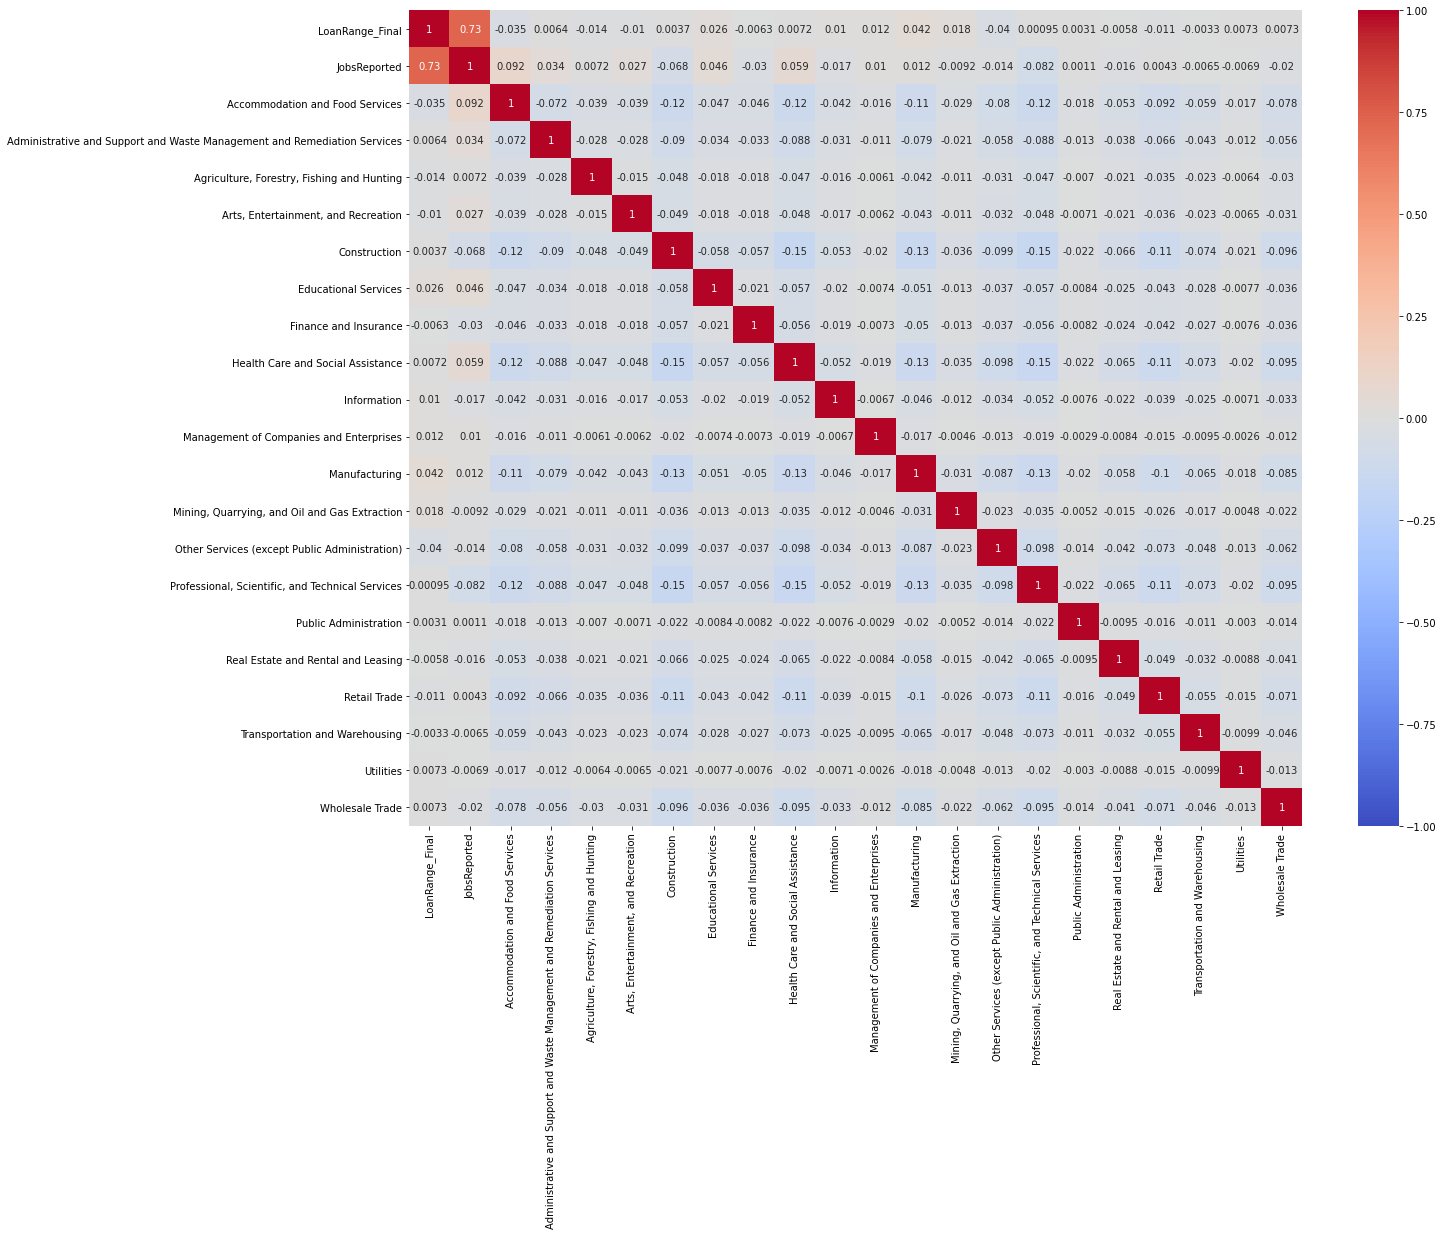

In [16]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(ppp_df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [17]:
ppp_df_new.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,LoanRange_Final,JobsReported,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,...,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
count,611335,611335,611335,611335,611335,611335,611335,611335,611335,611335,...,611335,611335,611335,611335,611335,611335,611335,611335,611335,611335
mean,653030,50.5262,0.0906851,0.0497567,0.0147726,0.015229,0.132754,0.0212519,0.0204503,0.129217,...,0.105737,0.00822626,0.0603597,0.129256,0.00322082,0.0273091,0.07746,0.0342431,0.00275626,0.057098
std,889895,69.846,0.287161,0.217442,0.120642,0.122463,0.339309,0.144223,0.141535,0.33544,...,0.307502,0.090325,0.238152,0.335484,0.0566608,0.162983,0.26732,0.181853,0.0524278,0.23203
min,250000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,250000,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,250000,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75%,675000,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
max,7.5e+06,500,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [25]:
# X1 is independent variable
x = np.array(ppp_merge['JobsReported']).reshape((-1,1))
# Y is dependent variable that will be predicted based on X1
y = np.array(ppp_merge['LoanRange_Final'])

In [26]:
print(x)
print(y)

[[295]
 [303]
 [500]
 ...
 [ 19]
 [ 19]
 [ 42]]
[7500000 7500000 7500000 ...  250000  250000  250000]


In [28]:
model = LinearRegression()

In [29]:
model.fit(x, y)

LinearRegression()

In [30]:
model = LinearRegression().fit(x, y)

In [31]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5339858226972419


In [32]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 182618.06701033033
slope: [9310.25549735]


In [33]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [182618.06701033]
slope: [[9310.25549735]]


In [34]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[2929143.43872791 3003625.48270669 4837745.81568419 ...  359512.92145994
  359512.92145994  573648.79789893]


In [35]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[2929143.43872791]
 [3003625.48270669]
 [4837745.81568419]
 ...
 [ 359512.92145994]
 [ 359512.92145994]
 [ 573648.79789893]]


In [20]:
#constant is adding because of independent coefficient
X = sm.add_constant(x) 
#fitting the variables to model
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LoanRange_Final   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 7.005e+05
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:52:09   Log-Likelihood:            -9.0086e+06
No. Observations:              611335   AIC:                         1.802e+07
Df Residuals:                  611333   BIC:                         1.802e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.826e+05    958.940    190.437      0.000    1.81e+05    1.84e+05
JobsReported  9310.2555     11.124    836.959      0.000    9288.453    9332.058
==============================================================================
Omnibus:                   445763.567   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21860746.095
Skew:                           3.007   Prob(JB):                         0.00
Kurtosis:                      31.671   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(ppp_df_new1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [ ]:
stats.ttest_1samp(ppp_merge['JobsReported'], 0)   

In [ ]:
ppp_list = ppp_df.select_dtypes(include='object').columns.to_list()
ppp_list

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,25))


sns.stripplot(x="Tour Type", y="Passengers", data=dest_df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Bookings by TourType")


#sns.stripplot(x="month_booking", y="TotalProfit", hue="month_departure", data=dest_df, ax=ax2, linewidth=1, palette="Set2")
#ax2.set_title("Bookings by BookingMonth")

#sns.stripplot(x="month_departure", y="TotalProfit", hue="profitable", data=dest_df, ax=ax3, linewidth=1, palette="Set2")
#ax3.legend_.remove()
#ax3.set_title("DepartureMonth & Profit")

plt.show()